In [ ]:
import geopandas as gp
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

<ipython-input-2-87d7f7214975>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
world["continent"].value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: continent, dtype: int64

In [ ]:
world = world[world["continent"] != "Antarctica"]
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world["continent"].value_counts()

Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Name: continent, dtype: int64

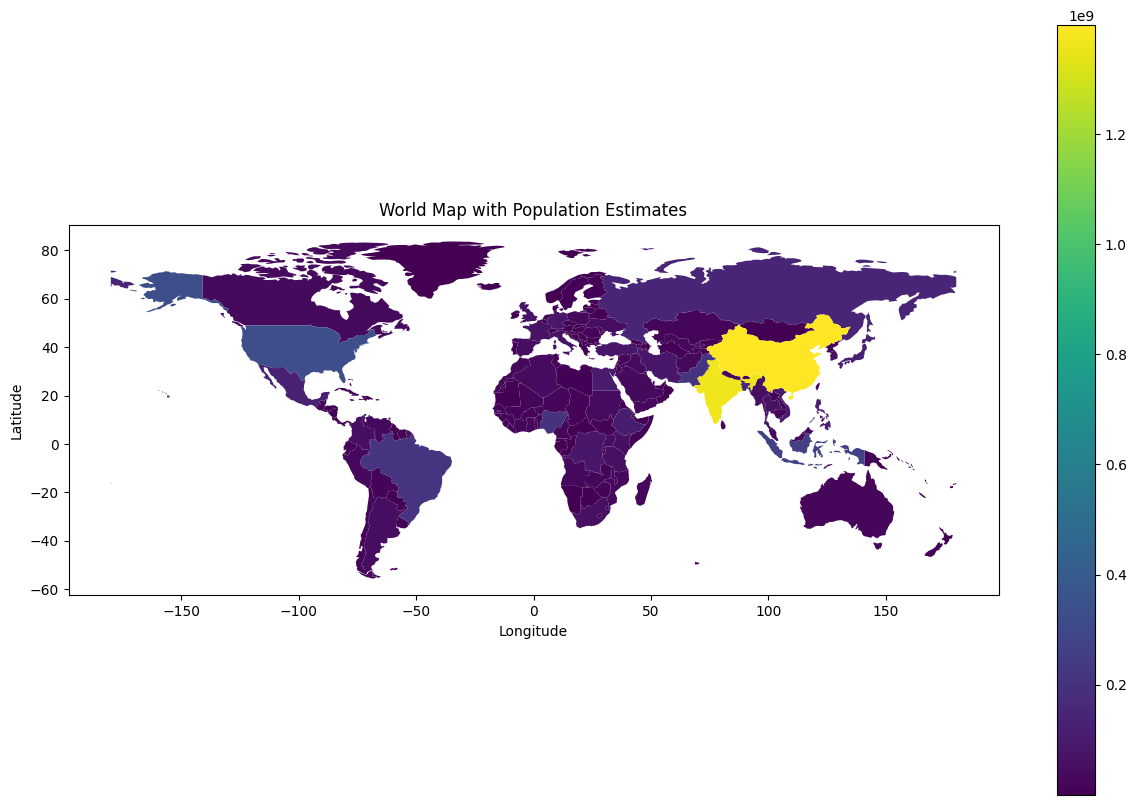

In [ ]:
world.plot(column='pop_est', legend=True, figsize=(15, 10))
plt.title('World Map with Population Estimates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
fig = px.scatter_geo(world, locations="iso_a3", color="continent",
                     hover_name="name", size="pop_est",
                     projection="natural earth")
fig.update_layout(title_text= 'World Map with Population Estimates')
fig.show()


<ipython-input-13-686a4c90869b>:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




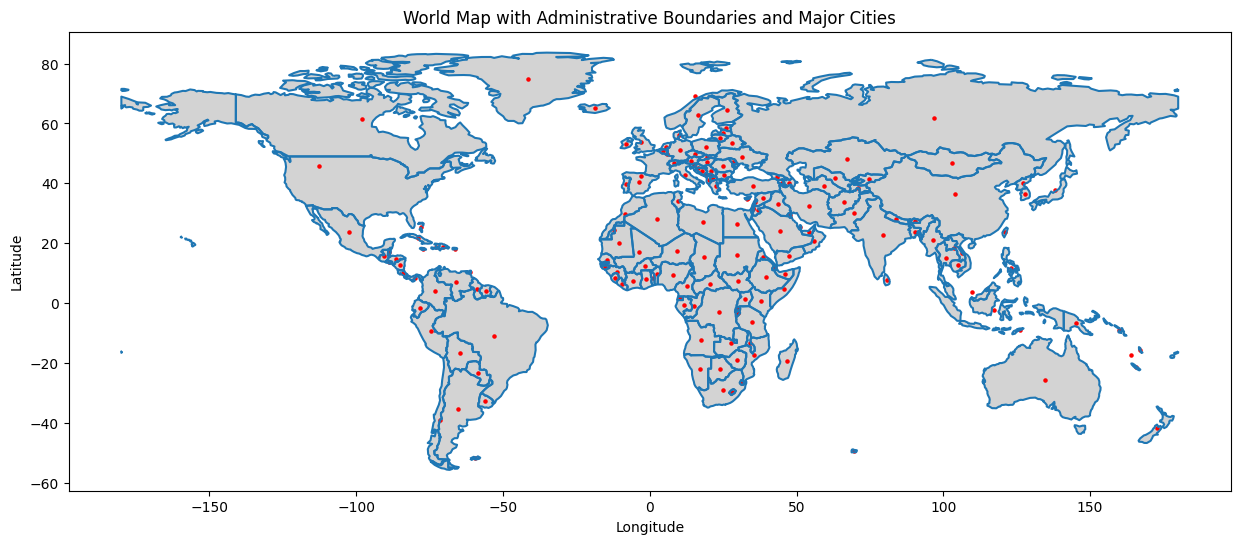

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color='lightgrey')
world.centroid.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('World Map with Administrative Boundaries and Major Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
fig = px.line_geo(world, locations="iso_a3", projection="natural earth")
fig.update_layout(title_text= 'World Map with Administrative Boundaries and Major Cities')
fig.show()


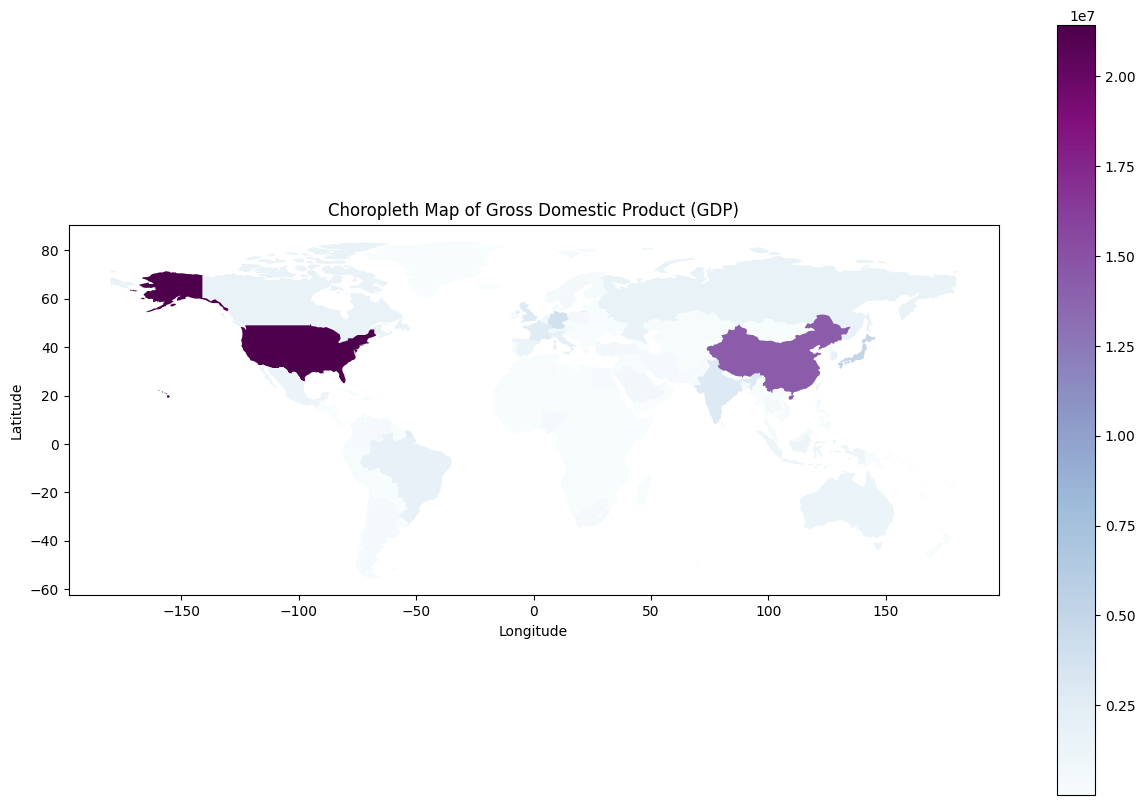

In [ ]:
world.plot(column='gdp_md_est', legend=True, figsize=(15, 10), cmap='BuPu')
plt.title('Choropleth Map of Gross Domestic Product (GDP)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
fig = px.choropleth(
        data_frame= world,
        locations= "iso_a3",
        color="gdp_md_est",
        projection = "natural earth",
        hover_name="name",
        color_continuous_scale = px.colors.sequential.Oranges,
        title= "Choropleth Map of Gross Domestic Product (GDP)"
    )
fig.show()

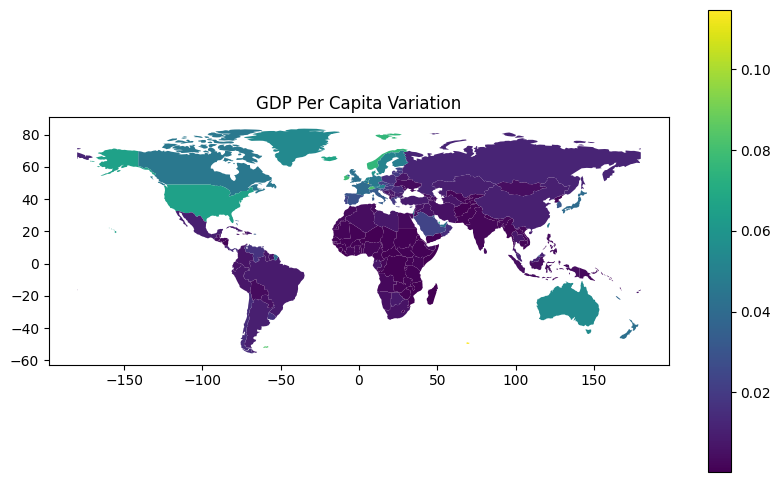

In [ ]:
# Calculate GDP per capita
world['gdp_per_cap'] = world['gdp_md_est'] / world['pop_est']

# Plot the Choropleth map for GDP per capita
world.plot(column='gdp_per_cap', legend=True, figsize=(10, 6))
plt.title('GDP Per Capita Variation')
plt.show()

In [ ]:
world['gdp_per_capita'] = world['gdp_md_est'] / world['pop_est']
fig = px.choropleth(world, locations="iso_a3",
                    color="gdp_per_capita",
                    hover_name="name",
                    projection="natural earth",
                    color_continuous_scale = px.colors.sequential.Oranges,
                    title= "Choropleth Map of Gross Domestic Product (GDP) per capita Variation")
fig.show()
